In [7]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

MASS_EARTH = 5.97e23 # kg
MASS_SUN = 1.98e30 # kg
D_APHELION = 1.52e11 # m
V_APHELION = 29290 # m/sec
GRAV_CONSTANT = 6.674e-11 # Nm^2/kg^2
SECONDS_IN_DAY = 86400 # seconds



def orbit_2D(state_vector):
    """
        To simulate the acceleaatation in earth's orbit in the gravitational force of sun

    """
    x, y, v_x, v_y = state_vector
    r_mag = np.hypot(x, y)
    force_mag = -(MASS_SUN * GRAV_CONSTANT)/ (r_mag**3)
    a_x = force_mag * x
    a_y = force_mag * y

    new_state = np.array([v_x, v_y, a_x, a_y])
    return new_state

def euler_integration_step(orbit_function, state_vector, time_step):
    return state_vector + (time_step * orbit_function(state_vector))

def rk4_integration_step(orbit_function, state_vector, time_step):
    k_1 = time_step * orbit_function(state_vector)
    k_2 = time_step * orbit_function(state_vector + 0.5 * k_1)
    k_3 = time_step * orbit_function(state_vector + 0.5 * k_2)
    k_4 = time_step * orbit_function(state_vector + k_3)
    updated_state_vector = state_vector + (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6
    return updated_state_vector

def leap_frog_integration_step(orbo)

def euler_integrate_complete(orbit_function, y0, time_series):
    y = np.zeros([len(time_series),len(y0)])
    y[0,:]=y0
    for k in range(1, len(time_series)):
        y[k,:] = euler_integration_step(orbit_function, y[k-1], time_series[k]-time_series[k-1])
    return y


def rk4_integrate_complete(orbit_function, y0, time_series):
    y = np.zeros([len(time_series),len(y0)])
    y[0,:]=y0
    for k in range(1, len(time_series)):
        y[k,:] = rk4_integration_step(orbit_function, y[k-1], time_series[k]-time_series[k-1])
    return y



    


In [32]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

MASS_EARTH = 5.97e23 # kg
MASS_SUN = 1.98e30 # kg
D_APHELION = 1.52e11 # m
V_APHELION = 29290 # m/sec
GRAV_CONSTANT = 6.674e-11 # Nm^2/kg^2
SECONDS_IN_DAY = 86400 # seconds



def orbit_2D(state_vector):
    """
        To simulate the acceleaatation in earth's orbit in the gravitational force of sun

    """
    x, y, v_x, v_y = state_vector
    r_mag = np.hypot(x, y)
    force_mag = -(MASS_SUN * GRAV_CONSTANT)/ (r_mag**3)
    a_x = force_mag * x
    a_y = force_mag * y

    state_ = np.array([v_x, v_y, a_x, a_y])
    return state_

def euler_integration_step(orbit_function, state_vector, time_step):
    return state_vector + (time_step * orbit_function(state_vector))

def rk4_integration_step(orbit_function, state_vector, time_step):
    k_1 = time_step * orbit_function(state_vector)
    k_2 = time_step * orbit_function(state_vector + 0.5 * k_1)
    k_3 = time_step * orbit_function(state_vector + 0.5 * k_2)
    k_4 = time_step * orbit_function(state_vector + k_3)
    updated_state_vector = state_vector + (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6
    return updated_state_vector

def leap_frog_integration_step(orbit_function,  state_vector, time_step):
    x, y, v_x, v_y = state_vector
    v_x, v_y, a_x, a_y = orbit_function(state_vector)
    x_updated = x + v_x * time_step + 0.5 * a_x * time_step * time_step
    y_updated = y + v_y * time_step + 0.5 * a_y * time_step * time_step

    _, _, a_next_x, a_next_y = orbit_function([x_updated, y_updated, v_x, v_y])
    v_x_updated = v_x + 0.5 * (a_x + a_next_x) * time_step
    v_y_updated = v_y + 0.5 * (a_y + a_next_y) * time_step

    return np.array([x_updated, y_updated, v_x_updated, v_y_updated])


    

def euler_integrate_complete(orbit_function, y0, time_series):
    y = np.zeros([len(time_series),len(y0)])
    y[0,:]=y0
    for k in range(1, len(time_series)):
        y[k,:] = euler_integration_step(orbit_function, y[k-1], time_series[k]-time_series[k-1])
    return y


def rk4_integrate_complete(orbit_function, y0, time_series):
    y = np.zeros([len(time_series),len(y0)])
    y[0,:]=y0
    for k in range(1, len(time_series)):
        y[k,:] = rk4_integration_step(orbit_function, y[k-1], time_series[k]-time_series[k-1])
    return y

def leapfrog_integrate_complete(orbit_function, y0, time_series):
    y = np.zeros([len(time_series),len(y0)])
    y[0,:]=y0
    for k in range(1, len(time_series)):
        y[k,:] = leap_frog_integration_step(orbit_function, y[k-1], time_series[k]-time_series[k-1])
    return y


def compute_energy(integration_solution):
    x,y,vx,vy = integration_solution.T
    kinetic_energy = (0.5 * MASS_EARTH) * np.square(np.sqrt(np.square(vx) + np.square(vy)))
    potential_energy = -(GRAV_CONSTANT * MASS_EARTH * MASS_SUN)* 1/np.sqrt(np.square(x) + np.square(y))

    total_energy = kinetic_energy + potential_energy
    return total_energy
    


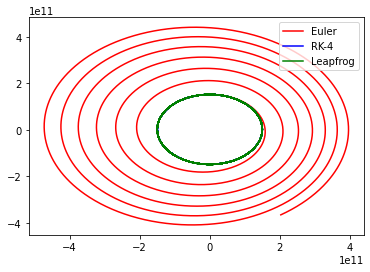

In [38]:
time_step = 2 * SECONDS_IN_DAY # 2 days
t = np.arange(0, 20 * 365 * SECONDS_IN_DAY, time_step)
y0 = np.array([0.0, D_APHELION, V_APHELION, 0.0])

sol_euler = euler_integrate_complete(orbit_2D, y0, t)
x,y,vx,vy = sol_euler.T
plt.plot(x,y, 'r', label='Euler')
sol_rk4 = rk4_integrate_complete(orbit_2D, y0, t)
x,y,vx,vy = sol_rk4.T
plt.plot(x,y, 'b', label='RK-4')
sol_leapfrog = leapfrog_integrate_complete(orbit_2D, y0, t)
x,y,vx,vy = sol_leapfrog.T
plt.plot(x,y, 'g', label='Leapfrog')
plt.legend()

In [34]:
time_step = 2 * SECONDS_IN_DAY # 2 days

t = np.arange(0, 20 * 365 * SECONDS_IN_DAY, time_step)
y0 = np.array([0.0, D_APHELION, V_APHELION, 0.0])

sol_euler = euler_integrate_complete(orbit_2D, y0, t)
x,y,vx,vy = sol_euler.T


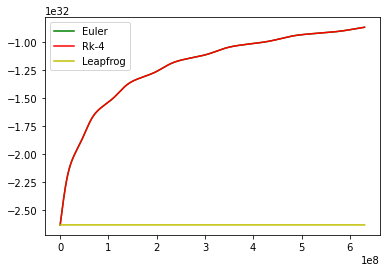

In [39]:
euler_energy = compute_energy(sol_euler)
plt.plot(t, euler_energy, 'g', label='Euler')
rk4_energy = compute_energy(sol_rk4)
plt.plot(t, euler_energy, 'r', label='Rk-4')
leapfrog_energy = compute_energy(sol_leapfrog)
plt.plot(t, leapfrog_energy, 'y', label='Leapfrog')
plt.legend()